In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
%cd ../gdrive/MyDrive/hw1ml/

/gdrive/MyDrive/hw1ml


In [4]:
%ls


'ML Homework 1 Multi-UAV conflict risk analysis.pdf'   train_set.tsv
 notebook.ipynb


read the dataset

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
import random

#make everything reproducible
random.seed(100)
np.random.seed(100)


dataset=pd.read_csv("train_set.tsv", sep='\t', header=0)
dataset_numpy=dataset.to_numpy()
x=dataset_numpy[:,:-2]
y=dataset_numpy[:,-2:]



use the minmax scaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)

use the standard scaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)


if you want to normalize the data

In [ ]:
from sklearn.preprocessing import normalize
x=normalize(x)

trying to use pca features

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
x = pca.fit_transform(x)

trying to descretize


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer


trying to extract nonlinear features

In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=QuantileTransformer().fit_transform(x)

split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=100)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(f"the classes and the number of occurrences in the train set are {np.unique(y_train[:,0], return_counts=True)}")
print(f"the classes and the number of occurrences in the test set are {np.unique(y_test[:,0], return_counts=True)}")

(750, 35) (750, 2) (250, 35) (250, 2)
the classes and the number of occurrences in the train set are (array([0., 1., 2., 3., 4.]), array([398, 252,  74,  24,   2]))
the classes and the number of occurrences in the test set are (array([0., 1., 2., 3., 4.]), array([140,  81,  22,   6,   1]))


to deal with unbalanced dataset one could try to undersple the overrapresented classes but here since the dataset is not big it doesn't work

In [ ]:
#if you want to undersample the data doenst work because i've not too much data 
from imblearn.under_sampling import RandomUnderSampler
over_sampler = RandomUnderSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train[:,0])
y_train=y_train.reshape(-1,1)
print(x_train.shape,y_train.shape)
print(f"the classes and the number of occurrences are {np.unique(y_train[:,0], return_counts=True)}")

((5, 35), (5, 1))

to deal with the unbalanced dataset one could try to oversample the underrepresentad classes but here since the dataset is not big it doesn't work

In [ ]:
#if you want to oversample i dont think it's a good idea because i've not too much data 
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train[:,0])
y_train=y_train.reshape(-1,1)
print(x_train.shape,y_train.shape)
print(f"the classes and the number of occurrences are {np.unique(y_train[:,0], return_counts=True)}")


(1990, 35) (1990, 1)
the classes and the number of occurrences are (array([0., 1., 2., 3., 4.]), array([398, 398, 398, 398, 398]))


function to print metrics and confusion matrix given a model to fit

In [ ]:
def classificationResults(x_train,x_test,y_train,y_test,models):
    if y_train.shape[1]>1:
        model.fit(x_train,y_train[:,0])
        y_pred_train=model.predict(x_train)
        y_pred_test=model.predict(x_test)
        print("Train F1 score: ",f1_score(y_train[:,0],y_pred_train,average='micro'))
        print("Train Precision score: ",precision_score(y_train[:,0],y_pred_train,average='micro'))
        print("Train Recall score: ",recall_score(y_train[:,0],y_pred_train,average='micro'))
        print("Test F1 score: ",f1_score(y_test[:,0],y_pred_test,average='micro'))
        print("Test Precision score: ",precision_score(y_test[:,0],y_pred_test,average='micro'))
        print("Test Recall score: ",recall_score(y_test[:,0],y_pred_test,average='micro'))
        print("\nConfusion Matrix test:")

        cm = confusion_matrix(y_test[:,0], y_pred_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
    else:
        model.fit(x_train,y_train)
        y_pred_train=model.predict(x_train)
        y_pred_test=model.predict(x_test)
        print("Train F1 score: ",f1_score(y_train,y_pred_train,average='micro'))
        print("Train Precision score: ",precision_score(y_train,y_pred_train,average='micro'))
        print("Train Recall score: ",recall_score(y_train,y_pred_train,average='micro'))
        print("Test F1 score: ",f1_score(y_test[:,0],y_pred_test,average='micro'))
        print("Test Precision score: ",precision_score(y_test[:,0],y_pred_test,average='micro'))
        print("Test Recall score: ",recall_score(y_test[:,0],y_pred_test,average='micro'))
        print("\nConfusion Matrix test:")

        cm = confusion_matrix(y_test[:,0], y_pred_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()


function to print the metrix given a model to fit

In [ ]:
def regressionResults(x_train,x_test,y_train,y_test,model):
    model.fit(x_train,y_train[:,1])
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print("Train MSE: ",np.mean((y_train[:,1]-y_pred_train)**2))
    print("Train MAE: ",np.mean(np.abs(y_train[:,1]-y_pred_train)))
    print("Test MSE: ",np.mean((y_test[:,1]-y_pred_test)**2))
    print("Test MAE: ",np.mean(np.abs(y_test[:,1]-y_pred_test)))
    

In [ ]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# parameters={'n_estimators':[10,50,100,200,500],'max_depth':[5,10,20,50,100],\
#             'min_samples_split':[2,5,10,20,50],'min_samples_leaf':[1,2,5,10,20],\
#             'criterion':['gini','entropy',"log_loss"]}
# model=RandomForestClassifier()

# clf = GridSearchCV(model, parameters)
# clf.fit(x_train, y_train[:,0])

# print(clf.best_params_)
# print(clf.best_score_)


In [ ]:

from sklearn import tree
model=tree.DecisionTreeClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

#there is a lot of overfitting because decision trees try to memorize the dataset so i try to use random forest to tackle this problem 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Train F1 score:  1.0
Train Precision score:  1.0
Train Recall score:  1.0
Test F1 score:  0.528
Test Precision score:  0.528
Test Recall score:  0.528

Confusion Matrix test:


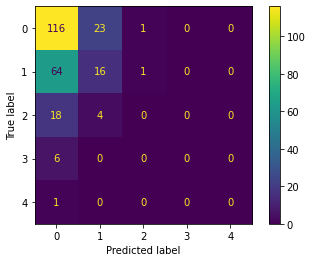

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)



In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
classificationResults(x_train,x_test,y_train,y_test,model)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
classificationResults(x_train,x_test,y_train,y_test,model)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters={'kernel':('linear', 'poly' ,"rbf","sigmoid"),'gamma':["scale","auto"],'class_weight':[None,"balanced"]}


model=svm.SVC()

clf = GridSearchCV(model, parameters)
clf.fit(x_train, y_train[:,0])

print(clf.best_params_)
print(clf.best_score_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


{'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
0.5466666666666666


In [ ]:
from sklearn import svm
parameters={}
model=svm.SVC()
clf = GridSearchCV(model, parameters)
clf.fit(x_train, y_train[:,0])

print(clf.best_params_)
print(clf.best_score_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


{}
0.3973333333333333


In [ ]:
from sklearn import svm
model=svm.SVC()
classificationResults(x_train,x_test,y_train,y_test,model)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
print(f" those are the parameters to optimize {model.get_params()}")
parameters={"n_estimators":[10,5,20,50,100,200,500,1000],"learning_rate":[0.01,0.001,0.0001,0.05,0.1,0.2,0.5,1]}
clf = GridSearchCV(model, parameters)
clf.fit(x_train, y_train[:,0])

print(clf.best_params_)
print(clf.best_score_)


 those are the parameters to optimize {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


{'learning_rate': 0.01, 'n_estimators': 50}
0.5386666666666666


Train F1 score:  0.44800000000000006
Train Precision score:  0.448
Train Recall score:  0.448
Test F1 score:  0.44800000000000006
Test Precision score:  0.448
Test Recall score:  0.448

Confusion Matrix test:


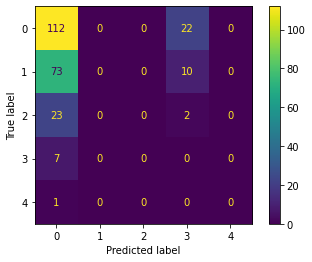

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()

classificationResults(x_train,x_test,y_train,y_test,model)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

In [ ]:
model=tree.DecisionTreeRegressor()
regressionResults(x_train,x_test,y_train,y_test,model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
regressionResults(x_train,x_test,y_train,y_test,model)

In [ ]:

from sklearn.linear_model import LinearRegression
model=LinearRegression()
regressionResults(x_train,x_test,y_train,y_test,model)


In [ ]:
# import support vector regression
from sklearn.svm import SVR
model=SVR()
regressionResults(x_train,x_test,y_train,y_test,model)

In [ ]:
#import polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
model=make_pipeline(PolynomialFeatures(2),LinearRegression())
regressionResults(x_train,x_test,y_train,y_test,model)
